In [94]:
#import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('default')

## Data Preparation and Exploration

### Dataset<br>

This is the sentiment140 dataset that was extracted using twitter's API by [Go et al. (2009)](https://www-cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf).<br>  

This dataset contains 1,600,000 tweets for multiple user in the year 2009. The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) based on emoticons in the tweets. The authors have annotated a tweet if it contains a tweet with positive emoticon like, :) else the tweet was annotated as negative if it contains a negative emoticon like :(. The tweets were scrapped from twitter using keyword in twitter's API.<br>  

A tweet was considered as neutral if it could ever appear as a frontpage newspaper headline or as a
sentence in Wikipedia. Different emoticons used for annotation are given in Table 1. For more information on target annotation for dataset please follow [this article](https://www-cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf).<br>    

Table 1. Emoticons used for annotation<br>   

| Emoticons mapped to :)  | Emoticons mapped to :(  |
|---|---|
| :-)  |  :-( |   
| : )  |  : ( |  
| :D  |   |   
| =)  |   |  
<br>   

### Data Dictionary<br>   

- ids - ID of the tweet  
- date - Date on which tweet was posted
- flag  - The query (lyx). If there is no query, then this value is NO_QUERY. 
- user - User who posted the tweet
- text - Message in the tweet
- target - Sentiment of the tweet


In [9]:
df = pd.read_csv('../data/data_set.csv', encoding="ISO-8859-1",
                 names=["target", "ids", "date", "flag", "user", "text"])

In [10]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
#reorder column names
df = df[['ids', 'flag', 'date', 'user', 'text', 'target']]
df.head()

,ids,flag,date,user,text,target
0,1467810369,NO_QUERY,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,1467810672,NO_QUERY,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,0
2,1467810917,NO_QUERY,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,1467811184,NO_QUERY,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,0
4,1467811193,NO_QUERY,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [15]:
# dimension of data 
df.shape

(1600000, 6)

In [13]:
#check data types and dimensions for columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   ids     1600000 non-null  int64 
 1   flag    1600000 non-null  object
 2   date    1600000 non-null  object
 3   user    1600000 non-null  object
 4   text    1600000 non-null  object
 5   target  1600000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [16]:
#check if there are null values in data
df.isna().sum().sum()

0

In [19]:
#check for duplicate rows 
df.duplicated().sum()

0

#### Some insights from initial data exploration<br>   

- There are 1.6 million rows and 6 columns in data. 
- Two columns, ids and target are integers while other columns are object datatypes. We know that we have three categories in target (positive, negative and neutral), therefore, datatype for this column should be categorical.   
- For the object type columns, the data type od date column should be timestamp and other columns should be strings. 
- There are no missing and null values in any of the columns of data. 
- There are no duplicate rows and columns in the data   

In [168]:
#check number of unique values for each column
def nunique_values(df):
    for col in df:
        print(f'Unique values in {col}: {df[col].nunique()}, {100*df[col].nunique()/df.shape[0]}%')
nunique_values(df)

Unique values in ids: 1598315, 99.8946875%
Unique values in flag: 1, 6.25e-05%
Unique values in date: 774363, 48.3976875%
Unique values in user: 659775, 41.2359375%
Unique values in text: 1581466, 98.841625%
Unique values in target: 2, 0.000125%


The number of unique values for ids are 99.9% of total data, that is there are 1685 duplicate ids in our data. Every tweet should only have one id. Let's explore further to understand what's going on in our dataset. For this let's see the data where ids are duplicated.   

In [51]:
df[df['ids'].duplicated(keep=False)].sort_values(by='ids')

,ids,flag,date,user,text,target
213,1467863684,NO_QUERY,Mon Apr 06 22:33:35 PDT 2009,DjGundam,Awwh babs... you look so sad underneith that s...,0
800261,1467863684,NO_QUERY,Mon Apr 06 22:33:35 PDT 2009,DjGundam,Awwh babs... you look so sad underneith that s...,4
275,1467880442,NO_QUERY,Mon Apr 06 22:38:04 PDT 2009,iCalvin,Haven't tweeted nearly all day Posted my webs...,0
800300,1467880442,NO_QUERY,Mon Apr 06 22:38:04 PDT 2009,iCalvin,Haven't tweeted nearly all day Posted my webs...,4
989,1468053611,NO_QUERY,Mon Apr 06 23:28:09 PDT 2009,mariejamora,@hellobebe I also send some updates in plurk b...,0
...,...,...,...,...,...,...
524290,2193428118,NO_QUERY,Tue Jun 16 08:26:44 PDT 2009,bubbles00,"finally finished typing!!!! Woohoooo , still ...",0
1599440,2193451289,NO_QUERY,Tue Jun 16 08:28:37 PDT 2009,faiznurdavid,"@fanafatin see, @misschimichanga tweet u to jo...",4
524345,2193451289,NO_QUERY,Tue Jun 16 08:28:37 PDT 2009,faiznurdavid,"@fanafatin see, @misschimichanga tweet u to jo...",0
524688,2193576442,NO_QUERY,Tue Jun 16 08:38:45 PDT 2009,emma_b_xox,Had an injection today. Not fun the rrst of t...,0


It seems some of the tweets are annotated as both positive and negative. Let's first find the total number of duplicate rows in our data (excluding target column) . 

In [54]:
df[df.loc[:, ['ids', 'flag', 'date', 'user', 'text']].duplicated()].sort_values(by='ids')

,ids,flag,date,user,text,target
800261,1467863684,NO_QUERY,Mon Apr 06 22:33:35 PDT 2009,DjGundam,Awwh babs... you look so sad underneith that s...,4
800300,1467880442,NO_QUERY,Mon Apr 06 22:38:04 PDT 2009,iCalvin,Haven't tweeted nearly all day Posted my webs...,4
801280,1468053611,NO_QUERY,Mon Apr 06 23:28:09 PDT 2009,mariejamora,@hellobebe I also send some updates in plurk b...,4
801573,1468100580,NO_QUERY,Mon Apr 06 23:42:57 PDT 2009,cristygarza,good night swetdreamss to everyonee and jare...,4
801650,1468115720,NO_QUERY,Mon Apr 06 23:48:00 PDT 2009,WarholGirl,@ientje89 aw i'm fine too thanks! yeah i miss ...,4
...,...,...,...,...,...,...
1598780,2193278017,NO_QUERY,Tue Jun 16 08:14:22 PDT 2009,janiecwales,oh dear HH is back please twitter do somethi...,4
1599298,2193403830,NO_QUERY,Tue Jun 16 08:24:44 PDT 2009,lauren__x33,english exam went okay revising for fre...,4
1599385,2193428118,NO_QUERY,Tue Jun 16 08:26:44 PDT 2009,bubbles00,"finally finished typing!!!! Woohoooo , still ...",4
1599440,2193451289,NO_QUERY,Tue Jun 16 08:28:37 PDT 2009,faiznurdavid,"@fanafatin see, @misschimichanga tweet u to jo...",4


There are 1685 duplicate tweets, equal to the total number of duplicate ids. This implies that the dulpicate ids and rows are due to annotation of certain tweets both as positive and negative. Let's try to find why these tweets were annotated twice. 

In [57]:
df_duplicated = df[df.loc[:, ['ids', 'flag', 'date', 'user', 'text']].duplicated(keep=False)].sort_values(by='ids').copy()

In [60]:
df_duplicated[['text', 'target']]

,text,target
213,Awwh babs... you look so sad underneith that s...,0
800261,Awwh babs... you look so sad underneith that s...,4
275,Haven't tweeted nearly all day Posted my webs...,0
800300,Haven't tweeted nearly all day Posted my webs...,4
989,@hellobebe I also send some updates in plurk b...,0
...,...,...
524290,"finally finished typing!!!! Woohoooo , still ...",0
1599440,"@fanafatin see, @misschimichanga tweet u to jo...",4
524345,"@fanafatin see, @misschimichanga tweet u to jo...",0
524688,Had an injection today. Not fun the rrst of t...,0


A visual inspection of duplicated rows showed that all the tweets in these rows generally carry a negative sentiment. Also looking at the pairs of duplicate tweets, the tweet with lower index always has a negative sentiment. Here I am dropping all the duplicate tweets with positive sentiments. 

In [65]:
#get the index of duplicated rows where target value is 0
duplicated_index = df_duplicated[df_duplicated['target'] == 0].index

In [67]:
df_clean = df.drop(index=duplicated_index).copy()

In [68]:
#snity check to see if the operation perfomed 
df_clean.shape[0] + len(duplicated_index)

1600000

In [69]:
#check number of unique values for each of the columns in cleaned dataframe 
nunique_values(df_clean)

Unique values in ids: 1598315, 100.0
Unique values in flag: 1, 6.256588970259305e-05
Unique values in date: 774363, 48.448710047769055
Unique values in user: 659775, 41.27940987852833
Unique values in text: 1581466, 98.94582732440101
Unique values in target: 2, 0.0001251317794051861


- We can see that the total number of unique values for ids and total number of rows in the data are same. This shows that each tweet has a unique id in our cleaned data. 
- There is just one unique value for the flag columns that shows that no specific queries were made to reterieve data.   
- The date column has 48.4% unique values. This implies multiple tweets were scraped from twitter's API at a single moment. 
- Further, there are 41.3% unique users as compare to total number of tweets. This implies that there are users who twitted more than once.    
- Finally, there are 99% unique tweets as compare to total number of tweets. This shows that multiple users can tweet same thing for instance, some of the tweets such as 'goodmorning' were tweeted by more than one users. 

__Let's explore distribution for each column in our data__

__Exploring column `Ids`__

In [71]:
df_clean['ids'].describe()

count    1.598315e+06
mean     1.998872e+09
std      1.935913e+08
min      1.467810e+09
25%      1.956927e+09
50%      2.002114e+09
75%      2.177094e+09
max      2.329206e+09
Name: ids, dtype: float64

The id repersents a unique identifier for each of the tweet. It keeps track for each of the tweet in our data. The total number values, unique values and total number of tweets in the dataset are equal. The value of Id starts at `1.467810e+09` and ends at `2.3292063+09`. 

__Exploring column `flag`__

The data type for this column is `string`. This column repersents the query for which the sentiment was analyzed. The follwoing table 2 provides some examples for the defination of the query.   
<br>  

|Sentiment    | flag    | Tweet    |
|----|-----|-----|
|Positive    |jquery     |dcostalis: Jquery is my new best friend.     |
|Neutral    |San Francisco     |schuyler: just landed at San Francisco     |
|Negative    |exam     |jvici0us: History exam studying ugh.     |

<br>  

From the above examples we can see that the falg is a word or combination of words for which the sentiment was determined.   

<br>

From the code below we can see that there is just one unique value, `NO_QUERY` in flag column. `NO_QUERY` represents that the target value, that is sentiment is not for a specific word rather it represents sentiment of the whole tweet. We can remove this column from our data set as it doesn't add any additional information to setiment for a tweet. 

In [75]:
print(df_clean['flag'].value_counts())
print(df_clean['flag'].nunique())

NO_QUERY    1598315
Name: flag, dtype: int64
1


In [76]:
df_clean.drop(columns='flag', inplace=True)
df_clean.head()

,ids,date,user,text,target
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,0
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,0
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",0


__Exploring column `target`__

In [124]:
df_clean['target'].unique()

array([0, 4], dtype=int64)

The column target has only two values 0 and 4. 0 represents negative sentiment while 4 represents positive sentiment. There are no tweets in this data with neutral sentiments. I am replacing 4 with 1 to compy it with the convetion for naming a binary target with 0 and 1.   

In [126]:
df_clean['target'].replace(to_replace=4, value=1, inplace=True)

In [127]:
#sanity check
df_clean['target'].unique()

array([0, 1], dtype=int64)

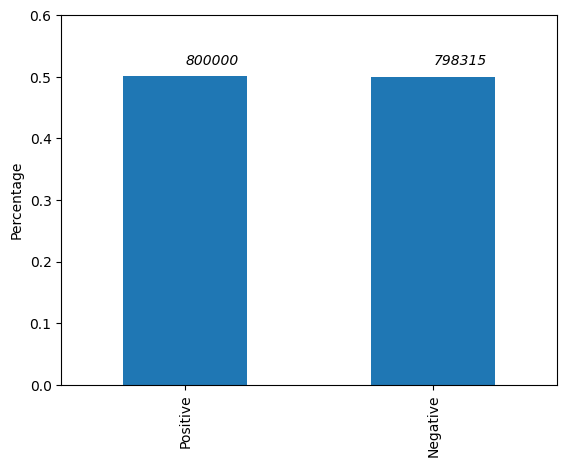

In [153]:
num_positives, num_negatives = df_clean['target'].value_counts()[1], df_clean['target'].value_counts()[0] #number of positve and negative targets
ax = plt.subplot() #axes object
#plot target column using pandas plot funtion
df_clean['target'].value_counts(normalize=True).plot(kind='bar', ylabel='Percentage', ax=ax)
#change properties of plot using ax object 
ax.xaxis.set_ticks(ticks=[1,0], labels=['Negative', 'Positive'])
ax.set_ylim(bottom=0, top=0.6)
ax.text(0, 0.52, f'{num_positives}', style='italic')
ax.text(1, 0.52, f'{num_negatives}', style='italic')
plt.show() #close figure

We can see from the figure above that the number of positives are slightly greater than number of negatives. Both the negatives and positves are around 50% of total number of targets.
This is a good news as both the classes are almost equal in the numbers, we don't have to worry about class imbalance during modelling process.  

__Exploring column `date`__

In [78]:
date = pd.to_datetime(df_clean['date'])

E:\Machine Learning Engineer\BrainStation\Bootcamp\7.Capstone\capstone_env\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [82]:
min(date), max(date)

(Timestamp('2009-04-06 22:19:45'), Timestamp('2009-06-25 10:28:31'))

The tweets in our dataset are between the dates `April 6, 2009` to `June 25, 2009`. 

In [83]:
df_clean['date'] = date

In [86]:
df_clean['date'].dtype

dtype('<M8[ns]')

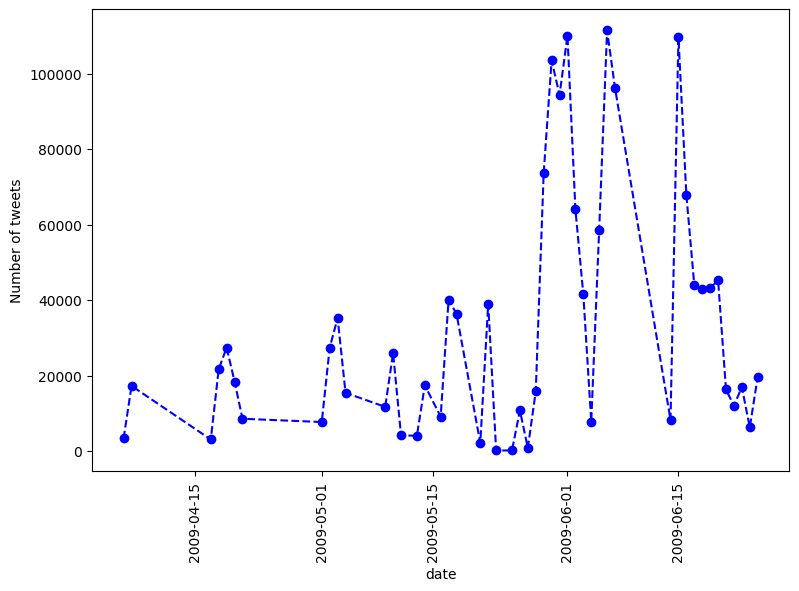

In [157]:
#let's see number of tweets for each day
ax = plt.subplot()
df_clean.groupby(df_clean['date'].dt.date)['text'].count().plot(style='--bo', ylabel='Number of tweets'
                                                               ,rot=90, figsize=(9,6), ax=ax)
plt.show()

In [117]:
df_clean.groupby(df_clean['date'].dt.date)['text'].count().sort_values(ascending=False)

date
2009-06-06    111513
2009-06-01    110148
2009-06-15    109654
2009-05-30    103554
2009-06-07     96233
2009-05-31     94432
2009-05-29     73755
2009-06-16     67912
2009-06-02     64115
2009-06-05     58705
2009-06-20     45364
2009-06-17     44012
2009-06-19     43136
2009-06-18     43004
2009-06-03     41532
2009-05-17     40106
2009-05-22     39018
2009-05-18     36415
2009-05-03     35288
2009-04-19     27433
2009-05-02     27402
2009-05-10     25984
2009-04-18     21732
2009-06-25     19694
2009-04-20     18433
2009-05-14     17431
2009-04-07     17289
2009-06-23     17002
2009-06-21     16360
2009-05-28     15885
2009-05-04     15457
2009-06-22     12009
2009-05-09     11732
2009-05-26     10770
2009-05-16      9135
2009-04-21      8579
2009-06-14      8261
2009-06-04      7835
2009-05-01      7708
2009-06-24      6299
2009-05-11      4184
2009-05-13      4063
2009-04-06      3354
2009-04-17      3083
2009-05-21      2128
2009-05-27       839
2009-05-25       169
2009-05-

We can see from the above figure that the number of tweets between `May 29, 2009` and `June 15, 2009` are highere compared to any other period of time. This depends on how data was scrapped by authors. It may be possible that authors scprapeed different number of tweets each day. 
<br>

The other possible reason may be that higher number of tweets were tweeted between this time. 

In [154]:
condition1 = pd.Timestamp(year=2009, month=5, day=29)<df_clean['date']
condition2 = df_clean['date']<pd.Timestamp(year=2009, month=6, day=16)
df_clean[condition1 & condition2]

,ids,date,user,text,target
161299,1957266782,2009-05-29 00:00:01,Kikirowr,@_erica I know right,0
161300,1957267208,2009-05-29 00:00:04,AlluringBri,i wish people would leave jon &amp; kate alone...,0
161301,1957267231,2009-05-29 00:00:04,rohan_kini,@roshnimo yup .. sad eh .. Betty man .. it sho...,0
161302,1957267963,2009-05-29 00:00:08,c9xgmr,they shot him he was still alive too...,0
161303,1957268164,2009-05-29 00:00:10,Pinguin98,very very bad headache that is getting worse b...,0
...,...,...,...,...,...
1575631,2189422922,2009-06-15 23:59:57,thepetshopboy,@nancerellababy couple tabs of pure mdma and y...,1
1575632,2189422986,2009-06-15 23:59:58,TenRings,I'm braving the world of Dudley to go to the m...,1
1575633,2189422993,2009-06-15 23:59:58,kelliesimpson,@curligirl \o/ good work day,1
1575634,2189423047,2009-06-15 23:59:58,jasonromero,"@gantzgraf Dude, great minds think alike! My f...",1


In [156]:
df_clean[condition1 & condition2].target.value_counts(normalize=True)

1    0.605443
0    0.394557
Name: target, dtype: float64

If we assume that more number of tweets were tweeted during the above mentioned time, we can see that 60% of tweets have positve sentiment while 40% of tweets have negative sentiment. This can imply two things either people have generally tweet postive things or there was a event during this period of time that made people tweet positively.    

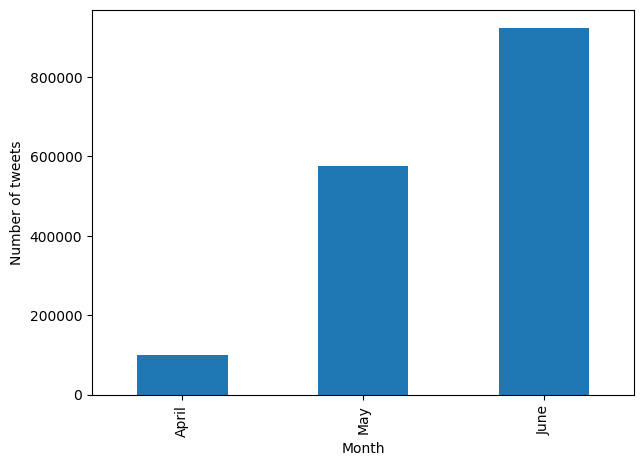

In [167]:
ax = plt.subplot()
df_clean.groupby(df_clean['date'].dt.month)['text'].count().plot(ylabel='Number of tweets', xlabel='Month'
                                                               ,rot=90, figsize=(7, 5), ax=ax,
                                                                kind='bar')
ax.xaxis.set_ticks(ticks=[0, 1, 2], labels=['April', 'May', 'June'])
plt.show()

We can see from this figure that number of tweets in the month of June are highest as compare to other months. Let's see how many days for each month there were tweets.    

In [174]:
df_month_day = df_clean.groupby([df_clean['date'].dt.month, df_clean['date'].dt.day])['text'].count()

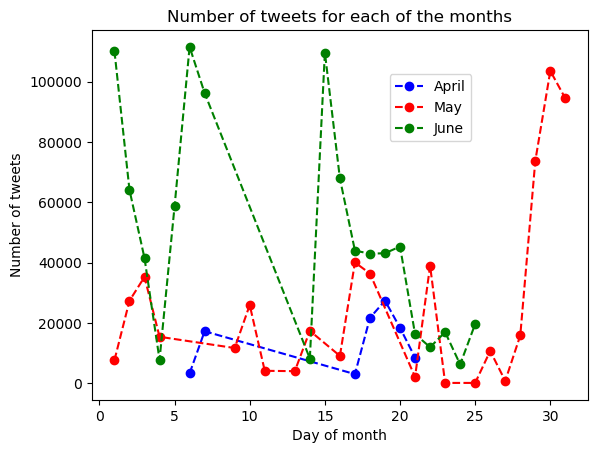

In [197]:
#Plotting number of tweets for each day of month April, May, and June 
plt.figure()
plt.plot(df_month_day.loc[4].index, df_month_day.loc[4].values, '--bo', label='April')
plt.plot(df_month_day.loc[5].index, df_month_day.loc[5].values, '--ro', label='May')
plt.plot(df_month_day.loc[6].index, df_month_day.loc[6].values, '--go', label='June')
plt.legend(loc=(0.6, 0.7))
plt.xlabel('Day of month')
plt.ylabel('Number of tweets')
plt.title('Number of tweets for each of the months')
plt.show()

In [193]:
#number of days for each month
df_month_day.loc[4].values.shape, df_month_day.loc[5].values.shape, df_month_day.loc[6].values.shape

((7,), (22,), (19,))

We can see from the figure above that tweets were scrapped for 7 days in April, 22 days in May, and 19 days in June, respectively. Total number of tweets are highest in the month of June followed by May and April. Although, tweets were scrapped for 19 days in June, the number of tweets are still more than number of tweets for the month of May. In general number of tweets on any given day in the month of June was higher than the months of April and May. 

__Exploring column `user`__

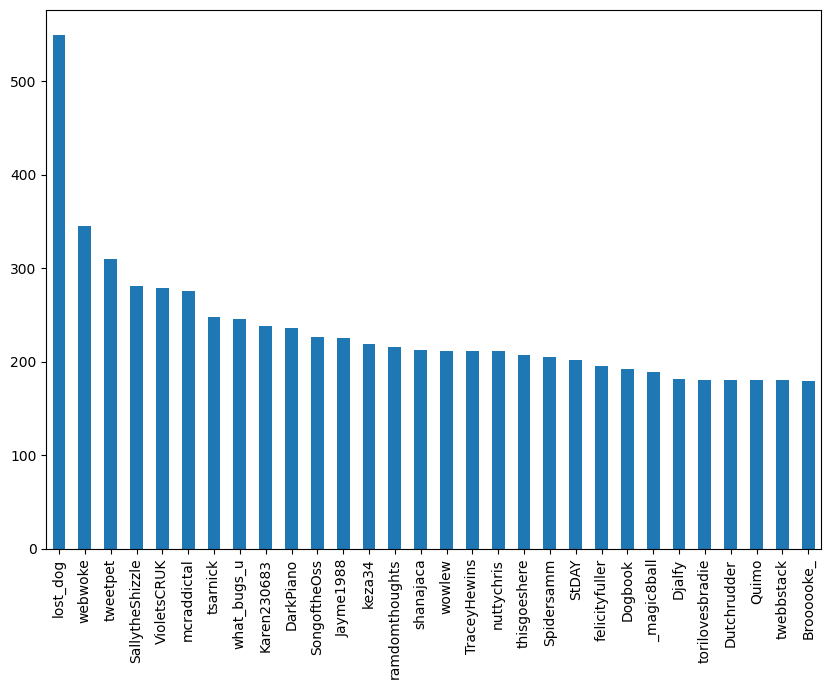

In [204]:
df_clean['user'].value_counts().head(30).plot(kind='bar', figsize=(10,7))
plt.show()

In [214]:
with pd.option_context('display.max_colwidth', None): #using with to temporarily set column with for dataframe to maximum
    display(df_clean[df_clean['user']=='lost_dog']['text'].head(1))

43935    @NyleW I am lost. Please help me find a good home. 
Name: text, dtype: object

In [218]:
df_clean[df_clean['user']=='webwoke']

,ids,date,user,text,target
363303,2047801265,2009-06-05 14:12:05,webwoke,"auchh, drop by 1 (32)elitestv.com",0
366529,2048883634,2009-06-05 15:56:07,webwoke,"auchh, drop by 1 (7)pedeee.com",0
366530,2048883882,2009-06-05 15:56:08,webwoke,"auchh, drop by 1 (17)rumahabi.com",0
366597,2048903368,2009-06-05 15:58:07,webwoke,"auchh, drop by 1 (18)twitter.com",0
366599,2048903446,2009-06-05 15:58:07,webwoke,"auchh, drop by 1 (19)yehia.org",0
...,...,...,...,...,...
1505838,2072460652,2009-06-07 21:04:09,webwoke,ohh yesss move up by 3 99. mybloglog.com,1
1505841,2072460726,2009-06-07 21:04:09,webwoke,Gooo... move up by 3 100. digg.com,1
1506014,2072494733,2009-06-07 21:08:09,webwoke,GoGoGo... move up by 2 105. ardhindie.com,1
1506015,2072494818,2009-06-07 21:08:09,webwoke,uhuiii... move up by 2 106. seo-guy.com,1


The figure above shows top thirty users who tweeted most. User `lost_dog` had the highest number of tweets compared to other tweeters. Looking at this user's tweets, it seems all the tweets are same and about `I am lost. Please help me find a good home.`. All the tweets are same but the user tweeted it multiple times by tagging different users. This shows that we may have to remove the users from text to remove duplicated text from `text` column.  

__Exploring column `text`__

In [225]:
with pd.option_context('display.max_colwidth', None):
    display(df_clean[['text', 'target']].head(40))

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,0
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",0
5,@Kwesidei not the whole crew,0
6,Need a hug,0
7,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?",0
8,@Tatiana_K nope they didn't have it,0
9,@twittera que me muera ?,0


From initial visual inspection, we can see that the `text` column contains links, and user names in addition to text. We have to remove user name and links from the `text` column as they do not provide any additional information about sentiment of the tweet. 